# Maximum Covariance Analysis 

class for MCA or SVD analysis

## Parameter

+ data1 and data2 (np.ndarray): shape (time, * space grid number)

## Method

+ solve: solve the SVD results 

+ get_pc(npt): get EC of first npt modes

+ get_pt(npt): get spatial patterns of first npt modes

+ get_eign: get eign values of SVD(MCA) result

+ get_varperc: get the proportion of mode variance

+ get_heterogeneous_map

+ get_homogeneous_map


## Example

### Load Modules

In [1]:
import sacpy as scp
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import sacpy.Map
import cartopy.crs as ccrs

<Figure size 640x480 with 0 Axes>

### Load Data (10m wind,SST)

In [2]:
sst = scp.load_sst()['sst'].loc["1991":"2021", -20:30, 150:275]
ssta = scp.get_anom(sst)
u = scp.load_10mwind()['u']
v = scp.load_10mwind()['v']

uua = scp.get_anom(u)
vua = scp.get_anom(v)
uv = np.concatenate([np.array(uua)[...,np.newaxis],np.array(vua)[...,np.newaxis]],axis=-1)

### MCA analysis

In [3]:
svd = scp.SVD(ssta,uv,complex=False)
svd.solve()

### Get the result

In [4]:
ptl, ptr = svd.get_pt(3)
pcl,pcr = svd.get_pc(3)

In [5]:
upt ,vpt = ptr[...,0] , ptr[...,1]
sst_pt = ptl

### Plot 

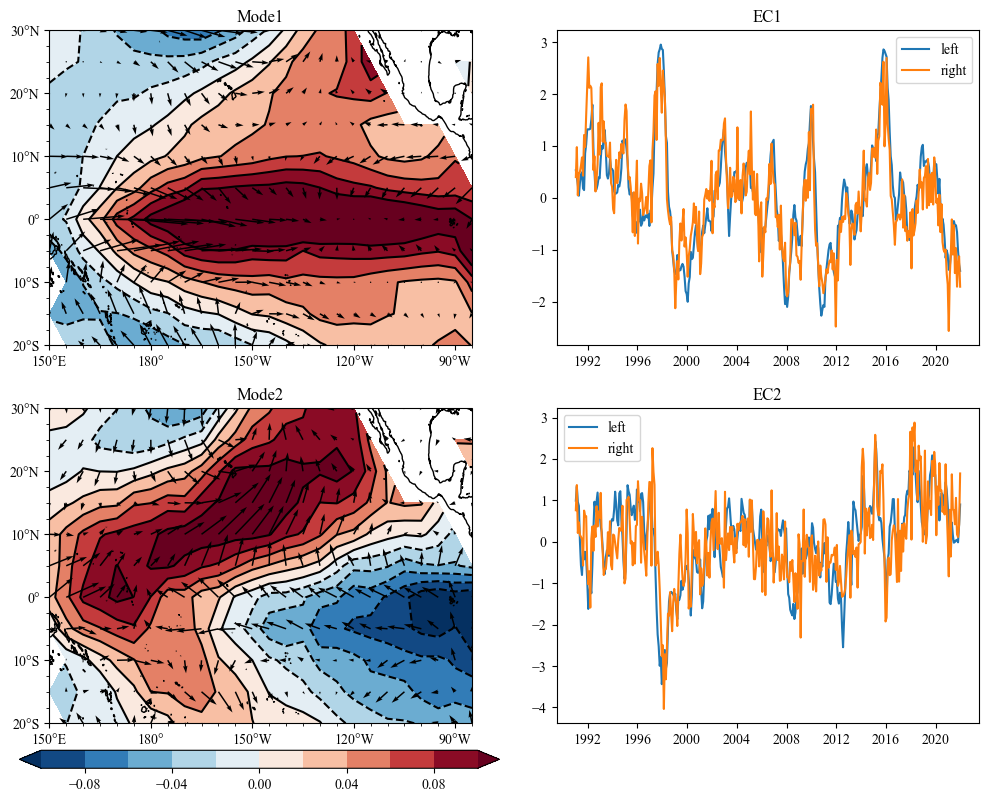

In [6]:
import cartopy.crs as ccrs
import sacpy.Map
lon , lat = np.array(ssta.lon) , np.array(ssta.lat)
fig = plt.figure(figsize=[12,9])
ax = fig.add_subplot(221,projection=ccrs.PlateCarree(central_longitude=180))
m1 = ax.scontourf(lon,lat,sst_pt[0],cmap='RdBu_r',levels=np.linspace(-0.1,0.1,11),extend="both")
ax.scontour(m1,colors="black")
ax.squiver(lon,lat,upt[0],vpt[0])
ax.init_map(smally=2.5)
ax.set_title("Mode1")
ax2 = fig.add_subplot(222)
ax2.plot(sst.time,pcl[0],label="left")
ax2.plot(sst.time,pcr[0],label="right")
ax2.legend()
ax2.set_title("EC1")
ax3 = fig.add_subplot(223,projection=ccrs.PlateCarree(central_longitude=180))
m2 = ax3.scontourf(lon,lat,sst_pt[1],cmap='RdBu_r',levels=np.linspace(-0.1,0.1,11),extend="both")
ax3.squiver(lon,lat,upt[1],vpt[1])
ax3.scontour(m2,colors="black")
ax3.init_map(smally=2.5)
ax3.set_title("Mode2")
ax4 = fig.add_subplot(224)
ax4.plot(sst.time,pcl[1],label="left")
ax4.plot(sst.time,pcr[1],label="right")
ax4.legend()
ax4.set_title("EC2")
cb_ax = fig.add_axes([0.1,0.06,0.4,0.02])
fig.colorbar(m1,cax=cb_ax,orientation="horizontal")